# Data Cleaning Exercise

Cleaning your data is crucial when starting a new data engineering project because it ensures the accuracy, consistency, and reliability of the dataset. Dirty data, which may include duplicates, missing values, and errors, can lead to incorrect analysis and insights, ultimately affecting the decision-making process. Data cleaning helps in identifying and rectifying these issues, providing a solid foundation for building effective data models and analytics. Additionally, clean data improves the performance of algorithms and enhances the overall efficiency of the project, leading to more trustworthy and actionable results.

Use Python, ```numpy```, ```pandas``` and/or ```matplotlib``` to analyse and clean your batch data:

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

Link to data source: ```<TODO>```

In [2]:
df = pd.read_csv('AAPL.csv')

## Understand the Data

View the first few rows, get summary statistics and check data types

In [3]:
df.head(10)

,symbol,date,open,high,low,close,volume,adjclose,dividends
0,AAPL,2024-01-02 00:00:00+00:00,187.149994,188.440002,183.889999,185.639999,82488700,184.532089,0.0
1,AAPL,2024-01-03 00:00:00+00:00,184.220001,185.880005,183.429993,184.250000,58414500,183.150375,0.0
2,AAPL,2024-01-04 00:00:00+00:00,182.149994,183.089996,180.880005,181.910004,71983600,180.824341,0.0
3,AAPL,2024-01-05 00:00:00+00:00,181.990005,182.759995,180.169998,181.179993,62303300,180.098694,0.0
4,AAPL,2024-01-08 00:00:00+00:00,182.089996,185.600006,181.500000,185.559998,59144500,184.452560,0.0
5,AAPL,2024-01-09 00:00:00+00:00,183.919998,185.149994,182.729996,185.139999,42841800,184.035065,0.0
6,AAPL,2024-01-10 00:00:00+00:00,184.350006,186.399994,183.919998,186.190002,46792900,185.078796,0.0
7,AAPL,2024-01-11 00:00:00+00:00,186.539993,187.050003,183.619995,185.589996,49128400,184.482376,0.0
8,AAPL,2024-01-12 00:00:00+00:00,186.059998,186.740005,185.190002,185.919998,40444700,184.810410,0.0
9,AAPL,2024-01-16 00:00:00+00:00,182.160004,184.259995,180.929993,183.630005,65603000,182.534088,0.0


In [4]:
print(df.dtypes)

symbol        object
date          object
open         float64
high         float64
low          float64
close        float64
volume         int64
adjclose     float64
dividends    float64
dtype: object


In [5]:
print("Allgemeine Informationen:")
df.info()

print("\nStatistische Zusammenfassung:")
print(df.describe(include='all'))

Allgemeine Informationen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     251 non-null    object 
 1   date       251 non-null    object 
 2   open       251 non-null    float64
 3   high       251 non-null    float64
 4   low        251 non-null    float64
 5   close      251 non-null    float64
 6   volume     251 non-null    int64  
 7   adjclose   251 non-null    float64
 8   dividends  251 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 17.8+ KB

Statistische Zusammenfassung:
       symbol                       date        open        high         low  \
count     251                        251  251.000000  251.000000  251.000000   
unique      1                        251         NaN         NaN         NaN   
top      AAPL  2024-01-02 00:00:00+00:00         NaN         NaN         NaN   
freq      251   

## Handle Missing Data

Identify missing values and fill or drop missing values

In [6]:
print("Fehlende Werte pro Spalte:")
print(df.isnull().sum())

Fehlende Werte pro Spalte:
symbol       0
date         0
open         0
high         0
low          0
close        0
volume       0
adjclose     0
dividends    0
dtype: int64


## Handle Duplicates

Identify duplicates and remove them

In [7]:
duplicates = df.duplicated()
print(f"Anzahl doppelter Zeilen: {duplicates.sum()}")

Anzahl doppelter Zeilen: 0


In [8]:
# If Duplicates: remove Duplicates
df = df.drop_duplicates()

## Handle Outliers

Identify outliers and remove or corret them

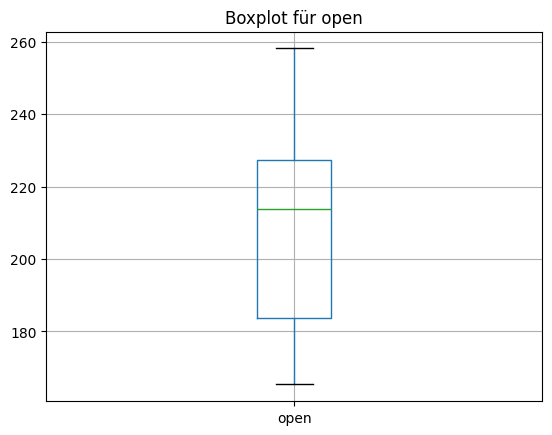

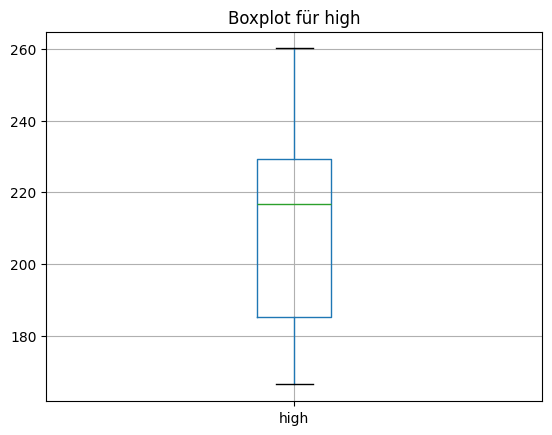

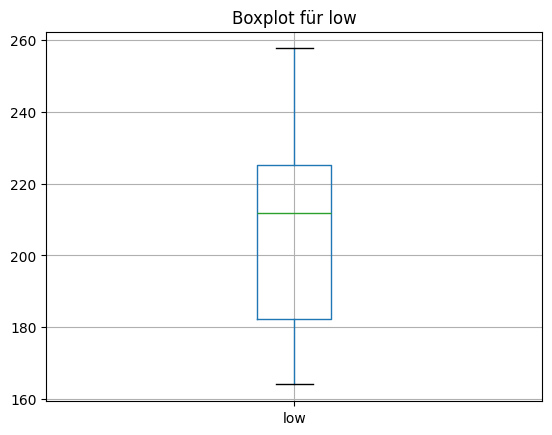

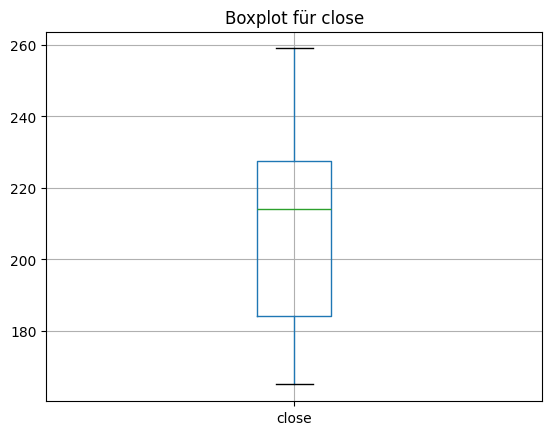

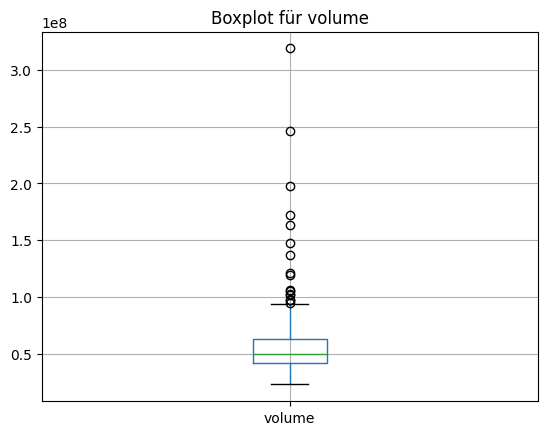

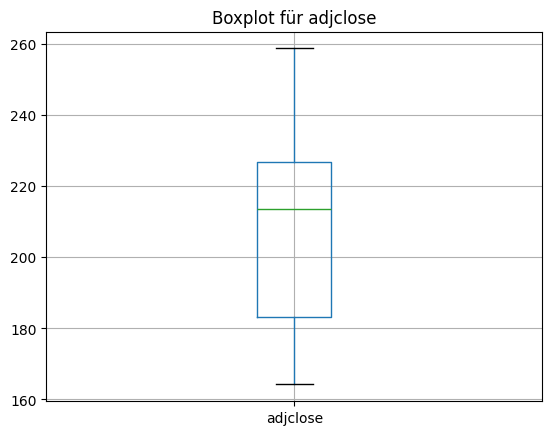

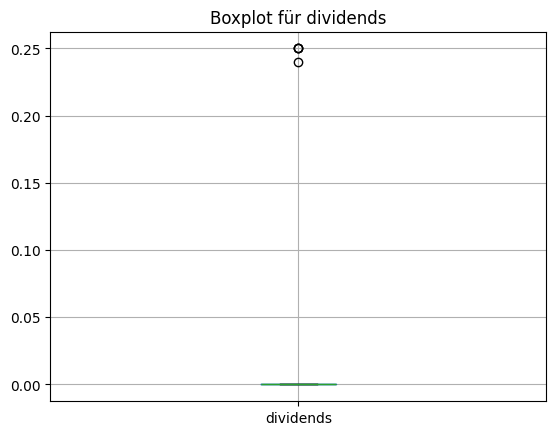

In [9]:
numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'adjclose', 'dividends']

# Boxplots
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot für {col}')
    plt.show()

## Handle Incorrect Data Types

In [10]:
# Umwandlung der Datumsspalte in datetime-Format
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

symbol                    object
date         datetime64[ns, UTC]
open                     float64
high                     float64
low                      float64
close                    float64
volume                     int64
adjclose                 float64
dividends                float64
dtype: object


## Visualize Data

Use graphes, plots and/or diagrams to visualize the data

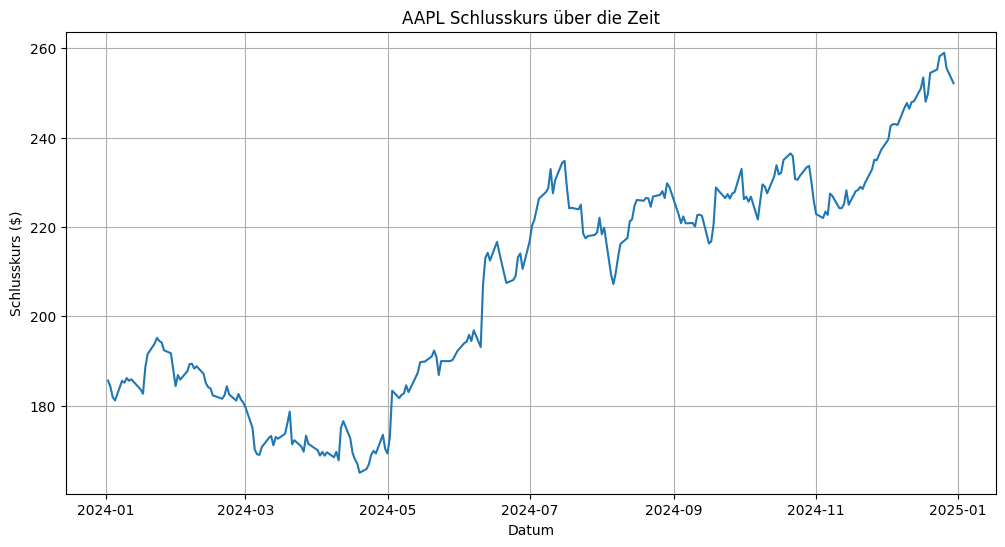

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.title('AAPL Schlusskurs über die Zeit')
plt.xlabel('Datum')
plt.ylabel('Schlusskurs ($)')
plt.grid(True)
plt.show()

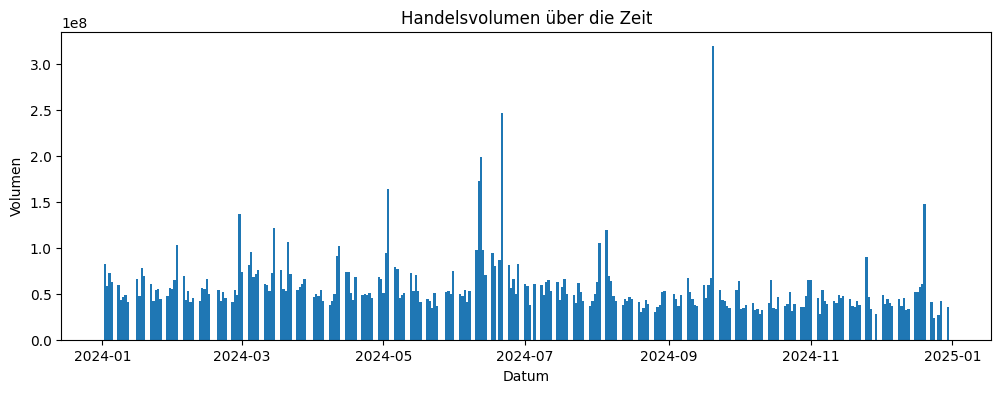

In [12]:
plt.figure(figsize=(12, 4))
plt.bar(df['date'], df['volume'], width=1.0)
plt.title('Handelsvolumen über die Zeit')
plt.xlabel('Datum')
plt.ylabel('Volumen')
plt.show()

## Save Cleaned Data

In [13]:
df.to_json('AAPL_cleaned.json', orient='records', lines=True)

print("Saved as AAPL_cleaned.json")

Saved as AAPL_cleaned.json
